In [70]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df_covid = pd.read_csv('data\covid19_states_humidityandcases.csv')

In [71]:
# look at basic info on the variables in our dataframe
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USAState          51 non-null     object 
 1   TotalCases        51 non-null     object 
 2   NewCases          51 non-null     object 
 3   TotalDeaths       51 non-null     object 
 4   NewDeaths         51 non-null     float64
 5   ActiveCases       51 non-null     object 
 6   Average Humidity  51 non-null     object 
 7   Population        51 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.3+ KB


In [72]:
# Write function to clean data
def cleanNumeric(df, exclude):
    
    df2 = df.copy()
    
    for col in df2.columns:
        df2[col] = df2[col].astype(str)  # cast to string
        df2[col] = df2[col].str.replace(',', '').str.replace('%','').str.replace('+','')

        if col not in exclude:
            df2[col] = df2[col].astype(float)  # cast to float
            
    return df2

df_covid = cleanNumeric(df_covid, ['USAState'])

In [73]:
# check variable set up
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USAState          51 non-null     object 
 1   TotalCases        51 non-null     float64
 2   NewCases          51 non-null     float64
 3   TotalDeaths       51 non-null     float64
 4   NewDeaths         51 non-null     float64
 5   ActiveCases       51 non-null     float64
 6   Average Humidity  51 non-null     float64
 7   Population        51 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [74]:
# check first few rows
df_covid.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population
0,new york,426807.0,0.0,32393.0,0.0,216906.0,75.60,19594330.0
1,california,319985.0,0.0,7030.0,4.0,227398.0,80.36,38066920.0
2,florida,269811.0,15300.0,4242.0,45.0,232919.0,77.05,19361792.0
3,texas,259465.0,0.0,3228.0,0.0,128357.0,76.95,26092033.0
4,new jersey,180672.0,0.0,15603.0,0.0,88899.0,71.31,8874374.0


In [75]:
def divideDf (df, col1, col2):
    
    df2 = df.copy()
    
    colNew = col1 + '%'
    df2[colNew] = df2[col1]/df2[col2] * 100
    
    return df2

In [76]:
df_covid = divideDf(df_covid, 'TotalCases', 'Population')
df_covid = divideDf(df_covid, 'TotalDeaths', 'Population')
df_covid = divideDf(df_covid, 'ActiveCases', 'Population')

df_covid

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
0,new york,426807.0,0.0,32393.0,0.0,216906.0,75.60,19594330.0,2.178217,0.165318,1.106983
1,california,319985.0,0.0,7030.0,4.0,227398.0,80.36,38066920.0,0.840585,0.018467,0.597364
2,florida,269811.0,15300.0,4242.0,45.0,232919.0,77.05,19361792.0,1.393523,0.021909,1.202983
3,texas,259465.0,0.0,3228.0,0.0,128357.0,76.95,26092033.0,0.994422,0.012372,0.491939
4,new jersey,180672.0,0.0,15603.0,0.0,88899.0,71.31,8874374.0,2.035884,0.175821,1.001750
5,illinois,154094.0,0.0,7369.0,0.0,31278.0,76.94,12868747.0,1.197428,0.057263,0.243054
6,arizona,122467.0,2537.0,2237.0,86.0,105836.0,79.40,6561516.0,1.866444,0.034093,1.612981
7,georgia,114401.0,0.0,2996.0,0.0,93715.0,75.76,9907756.0,1.154661,0.030239,0.945875
8,massachusetts,111398.0,0.0,8310.0,0.0,8741.0,75.08,6657291.0,1.673323,0.124826,0.131300
9,pennsylvania,99478.0,249.0,6958.0,5.0,19610.0,78.11,12758729.0,0.779686,0.054535,0.153699


In [77]:
# check out summary statistics for our dataframe
df_covid.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,64712.254902,466.450980,2648.529412,3.196078,33430.450980,77.570392,6.158962e+06,0.910211,0.035477,0.431146
std,87206.031070,2177.043438,5138.894871,13.484835,56185.995297,2.396029,6.981325e+06,0.501963,0.039783,0.397851
min,1200.000000,0.000000,17.000000,0.000000,174.000000,71.310000,5.752510e+05,0.086163,0.001364,0.022187
25%,12297.000000,0.000000,289.500000,0.000000,5106.500000,75.810000,1.726672e+06,0.573420,0.011232,0.126343
50%,35419.000000,0.000000,951.000000,0.000000,11746.000000,77.140000,4.383272e+06,0.863395,0.021437,0.300620
75%,74739.500000,21.000000,3018.500000,0.000000,26859.000000,79.450000,6.778207e+06,1.171960,0.041670,0.578897
max,426807.000000,15300.000000,32393.000000,86.000000,232919.000000,82.010000,3.806692e+07,2.178217,0.175821,1.612981


In [78]:
# Add a column with label for humidity level grouping

# create a list of our conditions
conditions = [
    (df_covid['Average Humidity'] <= 75.81),
    (df_covid['Average Humidity'] <= 77.14) & (df_covid['Average Humidity'] > 75.81),
    (df_covid['Average Humidity'] <= 79.45) & (df_covid['Average Humidity'] > 77.14),
    (df_covid['Average Humidity'] > 79.45)
    ]

# create a list of the values we want to assign for each condition
values = ['0-Low', '1-Med-low', '2-Med-high', '3-High']

# create a new column and use np.select to assign values to it using our lists as arguments
df_covid['Humidity level'] = np.select(conditions, values)
df_covid.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%,Humidity level
0,new york,426807.0,0.0,32393.0,0.0,216906.0,75.60,19594330.0,2.178217,0.165318,1.106983,0-Low
1,california,319985.0,0.0,7030.0,4.0,227398.0,80.36,38066920.0,0.840585,0.018467,0.597364,3-High
2,florida,269811.0,15300.0,4242.0,45.0,232919.0,77.05,19361792.0,1.393523,0.021909,1.202983,1-Med-low
3,texas,259465.0,0.0,3228.0,0.0,128357.0,76.95,26092033.0,0.994422,0.012372,0.491939,1-Med-low
4,new jersey,180672.0,0.0,15603.0,0.0,88899.0,71.31,8874374.0,2.035884,0.175821,1.001750,0-Low


In [79]:
# How do our metrics compare for states in different humidity buckets? Check out medians

dfHumid_med = df_covid.groupby('Humidity level').median()
dfHumid_med

,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
Humidity level,,,,,,,,,,
0-Low,73109.0,0.0,2996.0,0.0,24833.0,74.85,5887776.0,1.186827,0.056371,0.569646
1-Med-low,51079.0,0.0,1121.0,0.0,13177.0,76.91,5724692.0,0.863395,0.015620,0.295988
2-Med-high,27791.5,0.0,1046.5,0.0,15869.5,78.28,3237499.5,0.875760,0.023871,0.332058
3-High,7454.0,0.0,114.0,0.0,875.0,80.54,1328535.0,0.614817,0.012342,0.104827


In [80]:
# How do our metrics compare for states in different humidity buckets? Check out means

dfHumid_mean = df_covid.groupby('Humidity level').mean()
dfHumid_mean

,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
Humidity level,,,,,,,,,,
0-Low,96421.692308,49.384615,5846.846154,0.692308,46387.538462,74.597692,6.518651e+06,1.269243,0.063724,0.578400
1-Med-low,81761.000000,1515.076923,1922.076923,4.307692,42783.307692,76.760769,8.246038e+06,0.820018,0.021692,0.370967
2-Med-high,41840.750000,241.083333,1828.000000,7.583333,21832.333333,78.451667,4.870074e+06,0.993926,0.042468,0.585517
3-High,37066.230769,42.923077,934.076923,0.538462,21826.461538,80.539231,4.901942e+06,0.564096,0.014562,0.201573


The available variables to plot are: 
TotalCases
NewCases
TotalDeaths
NewDeaths
ActiveCases
Average Humidity
Population
TotalCases%
TotalDeaths%
ActiveCases%
Humidity level
What variable would you like for the x axis? Average Humidity
What variable would you like for the y axis? TotalCases%


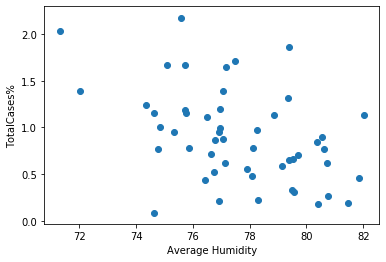

In [81]:
# Data Visualization

# Part one: user input

def getInput(prompt):
    userInput = input(prompt)
    error = "Sorry that variable is not available. Please try again."
    
    if userInput not in df_covid.columns:
        print(error)
        userInput = getInput(prompt)
        return userInput
        
    else:
        return userInput

# Print out variable list excluding labels
print("The available variables to plot are: ")
for v in df_covid.columns[1:]: print(v)

# Get user input for variables to plot
x = getInput("What variable would you like for the x axis? ")
y = getInput("What variable would you like for the y axis? ")

# Make scatterplot
plt.scatter(df_covid[x],df_covid[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

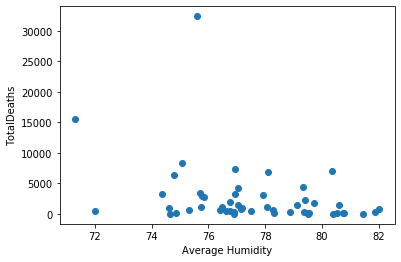

In [82]:
# Make scatterplot of total deaths vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['TotalDeaths'])
plt.xlabel('Average Humidity')
plt.ylabel('TotalDeaths')
plt.show()

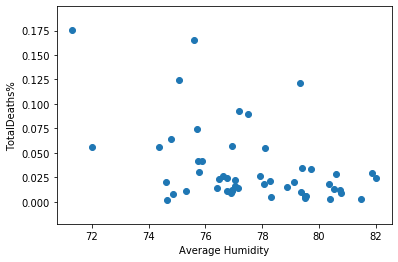

In [83]:
# Make scatterplot of total deaths vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['TotalDeaths%'])
plt.xlabel('Average Humidity')
plt.ylabel('TotalDeaths%')
plt.show()

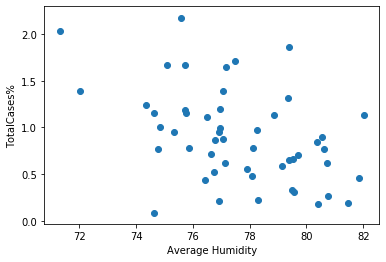

In [84]:
# Make scatterplot of total cases vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['TotalCases%'])
plt.xlabel('Average Humidity')
plt.ylabel('TotalCases%')
plt.show()

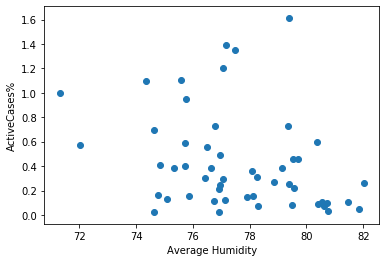

In [85]:
# Make scatterplot of total cases vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['ActiveCases%'])
plt.xlabel('Average Humidity')
plt.ylabel('ActiveCases%')
plt.show()